In [53]:
#기계학습응용 6주차 과제
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

#mnist 데이터 로드 후 훈련 데이터와 테스트 데이터를 7:3으로 나눔
digits = load_digits()
x_data = digits.data
y_data = digits.target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

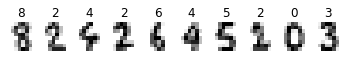

In [54]:
#1번: test의 앞 10개 그림 그리기

#데이터를 (n,8,8) 형태로 바꿈
x_train = x_train.reshape(-1, 8, 8) 
x_test = x_test.reshape(-1, 8, 8) 
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  #각 target의 이름

for index in range(10):  #10번 반복
    plt.subplot(1, 10, index + 1)  #1행 10열 중 index+1번째에 그림
    plt.imshow(x_test[index], cmap = "binary", interpolation = "nearest")  #이미지 그리기
    plt.axis('off')  #축은 그리지 않음
    plt.title(class_names[y_test[index]], fontsize = 12)  #그림에 이름을 달아줌
    
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)  #열간, 행간 공백 지정
plt.show()  #그림 출력

In [55]:
#2번: epoch 30번 돌리기

#훈련 데이터를 훈련 데이터와 검증 데이터로 나눔
x_valid, x_train = x_train[:50], x_train[50:]
y_valid, y_train = y_train[:50], y_train[50:]

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[8, 8]),  #입력층, 데이터는 (8,8) 형태로 들어감
    keras.layers.Dense(300, activation="relu"),  #은닉층1, 출력은 300개
    keras.layers.Dense(100, activation="relu"),  #은닉층2, 출력은 100개
    keras.layers.Dense(10, activation="softmax")  #출력층, 0~9로 출력은 10개
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])  #손실함수, 최적화방법
model.fit(x_train, y_train, epochs=30, validation_data = (x_valid, y_valid))  #데이터를 넣고 훈련

Epoch 1/30
38/38 [==============================] - 0s 4ms/step - loss: 1.2911 - accuracy: 0.7075 - val_loss: 0.3364 - val_accuracy: 0.9000
Epoch 2/30
38/38 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9470 - val_loss: 0.2049 - val_accuracy: 0.9200
Epoch 3/30
38/38 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9594 - val_loss: 0.2223 - val_accuracy: 0.9000
Epoch 4/30
38/38 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9743 - val_loss: 0.1135 - val_accuracy: 0.9800
Epoch 5/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9801 - val_loss: 0.0970 - val_accuracy: 1.0000
Epoch 6/30
38/38 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9859 - val_loss: 0.1558 - val_accuracy: 0.9400
Epoch 7/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9892 - val_loss: 0.1201 - val_accuracy: 0.9600
Epoch 8/30
38/38 [==